#Conversión con Programación clasica/regular

Donde el programador:
*  Crea las reglas 
*  Crea la logica de como se aplican esas reglas.

Ejemplo: software para convertir grados Celsius a Fahrenheit:

Fah = Celsius * 1.8 + 32



In [17]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

def f_conv_fah_cels(p_fahrenheit):
  cels = ((p_fahrenheit-32)*5)/9
  return cels

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')
print('50° Fahrenheit= ',
      f_conv_fah_cels(50),
      '° Celsius ')

50° Celsius=  122.0 ° Fahrenheit 
50° Fahrenheit=  10.0 ° Celsius 


*  pero y si no conocemos las reglas?
*  y si no es la logica es muy compleja o peor es muy variable?


##1. Importando librerias.

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd

##2. Definiendo los parametros de entrada y salida (capas)
---
Usaremos 10 datos para este ejercicio.

In [19]:
celsius    = np.array([-100, -55, -40, -23 , -10,  0,  8, 15, 22,  38], dtype=float)   #parametros de entrada
fahrenheit = np.array([-148, -67, -40, -9.4, 14, 32, 46, 59, 72, 100], dtype=float) #parametros de salida 

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/DerUwU/Deep-Learning/main/Trabajos/Datasets/training.csv")
df.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [21]:
df.shape

(16000, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


Notas (errores en la data):


*   Muy pocos datos 
*   Sin datos flotantes
*   Rango muy pequeño de datos




##3. Creando la red neuronal

---



*   Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)
*   usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT
*   crearemos 3 capas densas, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
    *   Units= cantidad de neuronas
    *   input_shape= cantidad de nueronas de entrada   

In [23]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

###3.1 Compilamos la red:


*   Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)
*  Definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).
*   tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños" 



In [24]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

##4. Entrenando

In [26]:
print("Comenzando entrenamiento...")
historial = modelo.fit(df['Celsius'], df['Fahrenheit'], epochs=1000, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/1000
500/500 [==============================] - 1s 939us/step - loss: 407687.6250
Epoch 2/1000
500/500 [==============================] - 0s 944us/step - loss: 199.5380
Epoch 3/1000
500/500 [==============================] - 0s 948us/step - loss: 183.8893
Epoch 4/1000
500/500 [==============================] - 0s 954us/step - loss: 163.8073
Epoch 5/1000
500/500 [==============================] - 0s 928us/step - loss: 139.8628
Epoch 6/1000
500/500 [==============================] - 0s 933us/step - loss: 112.9032
Epoch 7/1000
500/500 [==============================] - 0s 970us/step - loss: 86.0718
Epoch 8/1000
500/500 [==============================] - 0s 925us/step - loss: 60.4118
Epoch 9/1000
500/500 [==============================] - 0s 927us/step - loss: 38.2850
Epoch 10/1000
500/500 [==============================] - 0s 951us/step - loss: 21.7389
Epoch 11/1000
500/500 [==============================] - 0s 921us/step - loss: 10.0927
Epoch 12/1000
5

###4.1 Resultados del entrenamiento

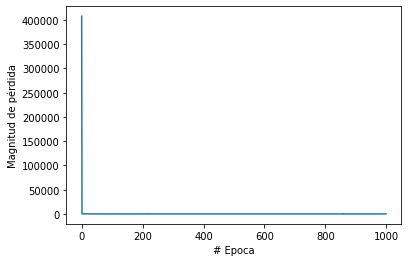

In [27]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

 ## 5. Generamos una predicción

In [28]:
v_celsius= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.99196]] 
Regular:  104.0 
Dif %: [[0.00772858]]


Prediccion de grados fahrenheit


In [30]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[103.99196]] 
Regular:  4.444444444444445 
Dif %: [[-2239.819]]


##6. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 




In [31]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.7999101]]
sesgo:  [31.99556]


la red sin decirle las reglas ni la logica pudo ella sola generar un algorimo para calcular un valor aproximado del 99% de acertabilidad.

fahr= cels *1.8 + 32

y= mx + b  (regresión lineal)

 ## 7. ¿Que sucede si agregamos mas neuromas y mas capas?

###7.1 Creamos un modelo con dos capas ocultas

In [32]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [33]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [39]:
#entrenamos
print("Comenzando entrenamiento...")
historial_V2 = modelo.fit(df['Celsius'], df['Fahrenheit'], epochs=10000, verbose=True)
print("Modelo_v2  entrenado!")

Se han truncado las últimas 5000 líneas del flujo de salida.
500/500 [==============================] - 1s 1ms/step - loss: 54.7096
Epoch 7502/10000
500/500 [==============================] - 1s 1ms/step - loss: 2.8226
Epoch 7503/10000
500/500 [==============================] - 1s 1ms/step - loss: 18.0042
Epoch 7504/10000
500/500 [==============================] - 1s 1ms/step - loss: 33.5861
Epoch 7505/10000
500/500 [==============================] - 1s 1ms/step - loss: 44.9520
Epoch 7506/10000
500/500 [==============================] - 1s 1ms/step - loss: 0.1476
Epoch 7507/10000
500/500 [==============================] - 1s 1ms/step - loss: 30.2973
Epoch 7508/10000
500/500 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 7509/10000
500/500 [==============================] - 1s 1ms/step - loss: 84.7178
Epoch 7510/10000
500/500 [==============================] - 1s 1ms/step - loss: 1.1696e-04
Epoch 7511/10000
500/500 [==============================] - 1s 1ms/step - lo

###7.2 Resultados del entrenamiento

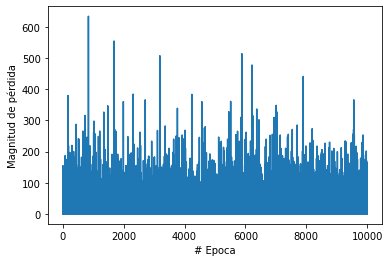

In [40]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

###7.3. Conociendo que sesgos y pesos resultantes


---
Una vez termina de entrenar las neuronas quedan con pesos y sesgos 


In [41]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.9149472 , -0.4369669 , -0.83375084]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.02274752,  0.31873512, -0.85426044],
       [ 0.17759848,  0.48649526, -0.3777082 ],
       [ 0.39374566,  0.05440998, -0.17324972]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[ 1.0363976 ],
       [-1.1529714 ],
       [-0.72405267]], dtype=float32), array([0.], dtype=float32)]


###7.4. Generamos una predicción

In [42]:
v_celsius= 50
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  50 ° = Fahrenheit: 
IA:  [[-27.773169]] 
Regular:  122.0 
Dif %: [[122.76489]]


In [43]:
v_fahrenheit= 40
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_fahrenheit])
result_real= f_conv_fah_cels(v_fahrenheit)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_fahrenheit, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[-22.218536]] 
Regular:  4.444444444444445 
Dif %: [[599.917]]
